# **Advanced Data Science for Innovation - Assignment 1**


## NBA Career Prediction: Predict 5-Year Longevity for NBA Rookies
**Student Name:** Sean Williams

**Team Name:** Group 1
* Nuwan Munasinghe
* Wenying Wu
* Nathan Fragar
* Sean Williams
* Carol Myhill

## Environment Setup

In [104]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from importlib.machinery import SourceFileLoader
import datetime
dataprep = SourceFileLoader('sets', '../src/data/prepare.py').load_module()
base = SourceFileLoader('base', '../src/models/null.py').load_module()
mdlhelpers = SourceFileLoader('mdlhelpers', '../src/models/helpers.py').load_module()
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [110]:
def train_LR (set=None):
    # 1. load saved dataset from filesystem
    X_train, y_train, X_val, y_val, X_test, y_test = dataprep.load_sets(set)

    # 2. Assess Baseline of Train and Validation datasets
    # Instantiate base model class
    base_model = base.NullModel(target_type="classification")
    # Fit base model and make predictions on traning and validation date
    y_base_train_preds = base_model.fit_predict(y_train)
    y_base_val_preds = base_model.fit_predict(y_val)
    # Print metrics
    print("******************")
    print("*   Null Model   *")
    print("******************")
    mdlhelpers.score_base(y_base_train_preds, y_train, y_base_val_preds, y_val)

    # 3. Train various models with default parameters to provide a comparitive metrics
    print("**************************")
    print("*   Comparison Models    *")
    print("**************************")
    print(datetime.datetime.now())
    models_to_fit = {"Logistic Regression": LogisticRegression(random_state=8, solver='liblinear'),
                     "KNN Euclidian": KNeighborsClassifier(metric='euclidean'),
                     "KNN Manhattan": KNeighborsClassifier(metric='manhattan'),
                     "XGBoost": xgb.XGBClassifier(random_state=8, use_label_encoder=False, eval_metric='logloss')}
    clf1 = mdlhelpers.fit_score_models (models_to_fit, X_train, y_train, X_val, y_val)    

    # 4. Perform a grid search to determine which hyperparameters result in best performance
    print("**********************")
    print("*   Grid Search LR   *")
    print("**********************")
    print(datetime.datetime.now())
    # Instantiate LR class
    clf2 = LogisticRegression(random_state=8)
    # Build list of Hyperparameters to be tuned
    #class_weight = ['balanced']
    solver = ['newton-cg','liblinear','lbfgs']
    penalty = ['none','l2','l1']
    c_values = [100,10,1.0,0.1,0.01]
    max_iter = [500]
    # Build dictionary for grid search
    #param_grid = dict(solver=solver, penalty=penalty, C=c_values, class_weight=class_weight, max_iter=max_iter)
    param_grid = dict(solver=solver, penalty=penalty, C=c_values, max_iter=max_iter)
    # Setup cross validation folds
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
    # Grid search with cross validation
    grid_search = GridSearchCV(clf2, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
    # Fit to data
    grid_result = grid_search.fit(X_train, y_train)
    # Print best score and parameters
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # 5. Get the best model from the grid search. Fit and score
    print("*********************")
    print("*   Best LR Model   *")
    print("*********************")
    print(datetime.datetime.now())
    models_to_fit = {"Logistic Regression": grid_result.best_estimator_}
    clf3 = mdlhelpers.fit_score_models (models_to_fit, X_train, y_train, X_val, y_val, "YES", "NO")

In [111]:
def train_xgboost (set=None):
    # 1. load saved dataset from filesystem
    X_train, y_train, X_val, y_val, X_test, y_test = dataprep.load_sets(set)

    # 2. Assess Baseline of Train and Validation datasets
    # Instantiate base model class
    base_model = base.NullModel(target_type="classification")
    # Fit base model and make predictions on traning and validation date
    y_base_train_preds = base_model.fit_predict(y_train)
    y_base_val_preds = base_model.fit_predict(y_val)
    # Print metrics
    print("******************")
    print("*   Null Model   *")
    print("******************")
    mdlhelpers.score_base(y_base_train_preds, y_train, y_base_val_preds, y_val)

    # 3. Train various models with default parameters to provide a baseline
    print("**************************")
    print("*   Comparison Models    *")
    print("**************************")
    print(datetime.datetime.now())
    models_to_fit = {"Logistic Regression": LogisticRegression(random_state=8, solver='liblinear'),
                     "KNN Euclidian": KNeighborsClassifier(metric='euclidean'),
                     "KNN Manhattan": KNeighborsClassifier(metric='manhattan'),
                     "XGBoost": xgb.XGBClassifier(random_state=8, use_label_encoder=False, eval_metric='logloss')}
    clf4 = mdlhelpers.fit_score_models (models_to_fit, X_train, y_train, X_val, y_val)

    # 4. Perform a grid search on XGBoost to determine which hyperparameters result in best performance
    print("*******************")
    print("*   Grid Search   *")
    print("*******************")
    print(datetime.datetime.now())
    # Instantiate XGBoost class    
    clf5 = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    # Build list of Hyperparameters to be tuned
    n_estimators = [100, 200, 300, 400, 500]
    learning_rate = [0.0001, 0.001, 0.01, 0.1]
    subsample = [0.5, 0.7, 1.0]
    max_depth = [3, 7, 9]
    # Build dictionary for grid search
    param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
    # Setup cross validation folds
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
    # Grid search with cross validation
    grid_search = GridSearchCV(clf5, param_grid, scoring="accuracy", n_jobs=-1, cv=kfold)
    # Fit to data
    grid_result = grid_search.fit(X_train, y_train)
    # Print best score and parameters
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

    # 5. Get the best model from the grid search. Fit and score
    print("**************************")
    print("*   Best XGBoost Model   *")
    print("**************************")
    print(datetime.datetime.now())
    models_to_fit = {"XGBoost": grid_result.best_estimator_}
    clf6 = mdlhelpers.fit_score_models (models_to_fit, X_train, y_train, X_val, y_val, "YES", "NO")

# 3. Modelling

## 3.1 Build Models

### 3.1.1 Logistic Regression (with all scaled features)

******************
*   Null Model   *
******************


,model,t_accuracy,t_precision,t_recall,t_F1,v_accuracy,v_precision,v_recall,v_F1
0,Base,0.833594,0.833594,1.0,0.757942,0.83375,0.83375,1.0,0.758161


**************************
*   Comparison Models    *
**************************
2022-02-27 23:39:39.067221


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.834063,0.836192,0.996064,0.909153,0.706047,0.831875,0.834275,0.996252,0.908097,0.698507
1,KNN Euclidian,0.850938,0.863568,0.975258,0.916021,0.851987,0.815625,0.846103,0.952024,0.895944,0.586492
2,KNN Manhattan,0.852344,0.863050,0.978069,0.916967,0.856807,0.810625,0.841165,0.952774,0.893497,0.601494
3,XGBoost,0.983906,0.981059,1.000000,0.990439,0.999480,0.819375,0.838626,0.970015,0.899548,0.618934


**********************
*   Grid Search LR   *
**********************
2022-02-27 23:39:46.773737


C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

Best: 0.834219 using {'C': 100, 'max_iter': 500, 'penalty': 'none', 'solver': 'newton-cg'}
*********************
*   Best LR Model   *
*********************
2022-02-27 23:39:54.285480


C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.834531,0.838184,0.993252,0.909153,0.709084,0.831875,0.835539,0.994003,0.907908,0.696734


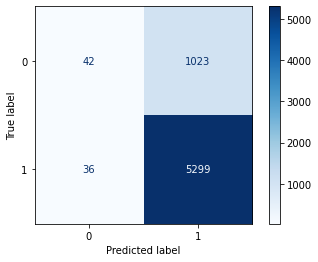

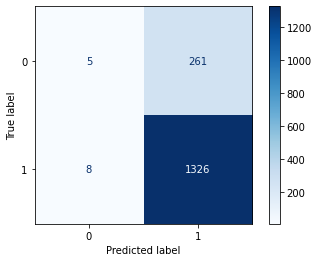

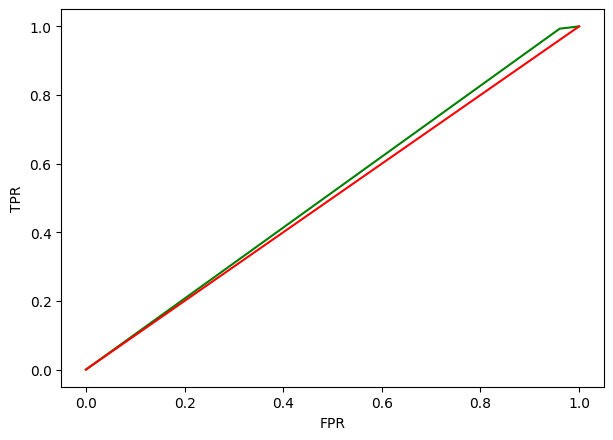

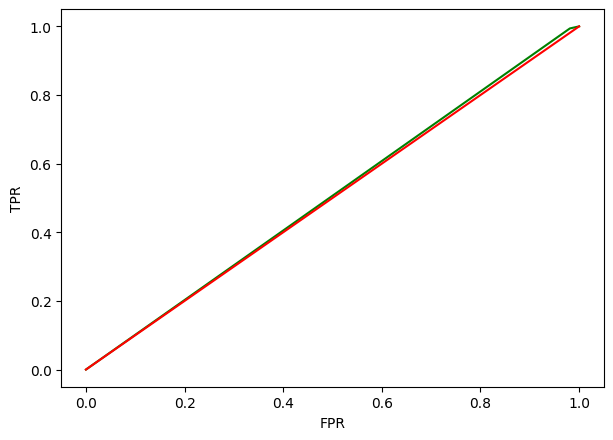

In [112]:
train_LR('scaled')

---
### 3.1.2 Logistic Regression (with 16 most correlated scaled featured)

******************
*   Null Model   *
******************


,model,t_accuracy,t_precision,t_recall,t_F1,v_accuracy,v_precision,v_recall,v_F1
0,Base,0.833594,0.833594,1.0,0.757942,0.83375,0.83375,1.0,0.758161


**************************
*   Comparison Models    *
**************************
2022-02-27 23:25:57.193289


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.834375,0.836561,0.995876,0.909293,0.704629,0.831875,0.834275,0.996252,0.908097,0.697597
1,KNN Euclidian,0.853906,0.864118,0.978632,0.917817,0.856692,0.804375,0.836076,0.952024,0.890291,0.582097
2,KNN Manhattan,0.853281,0.864511,0.977132,0.917378,0.859845,0.809375,0.839156,0.954273,0.893020,0.607729
3,XGBoost,0.964063,0.958835,0.999813,0.978895,0.996906,0.808125,0.839841,0.951274,0.892091,0.637663


**********************
*   Grid Search LR   *
**********************
2022-02-27 23:26:03.731801
Best: 0.833750 using {'C': 0.01, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
*********************
*   Best LR Model   *
*********************
2022-02-27 23:26:12.765387


C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
75 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, sel

,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.83375,0.833724,1.0,0.909323,0.68683,0.83375,0.83375,1.0,0.909339,0.673366


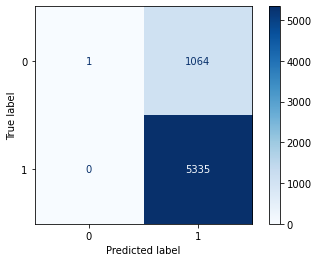

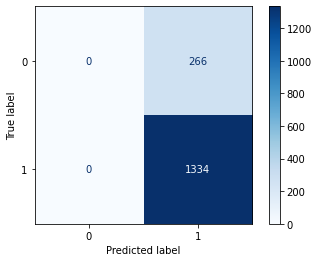

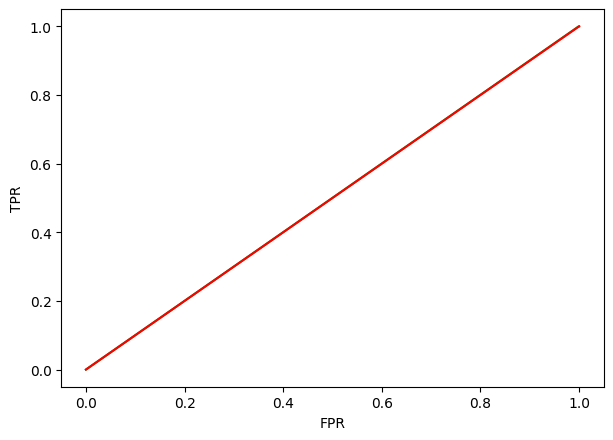

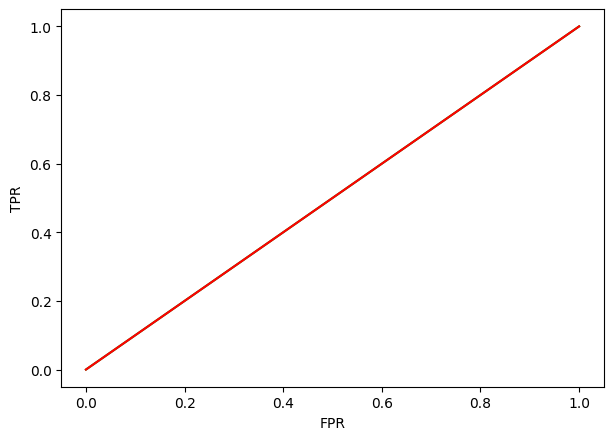

In [108]:
train_LR('scaled_lr_features')

---
### 3.1.3 XGBoost (with all features)

******************
*   Null Model   *
******************


,model,t_accuracy,t_precision,t_recall,t_F1,v_accuracy,v_precision,v_recall,v_F1
0,Base,0.833594,0.833594,1.0,0.757942,0.83375,0.83375,1.0,0.758161


**************************
*   Comparison Models    *
**************************
2022-02-27 23:06:26.257608


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.834063,0.836192,0.996064,0.909153,0.706047,0.831875,0.834275,0.996252,0.908097,0.698507
1,KNN Euclidian,0.850938,0.863568,0.975258,0.916021,0.851987,0.815625,0.846103,0.952024,0.895944,0.586492
2,KNN Manhattan,0.852344,0.863050,0.978069,0.916967,0.856807,0.810625,0.841165,0.952774,0.893497,0.601494
3,XGBoost,0.983906,0.981059,1.000000,0.990439,0.999480,0.819375,0.838626,0.970015,0.899548,0.618934


*******************
*   Grid Search   *
*******************
2022-02-27 23:06:33.985613
Best: 0.834219 using {'learning_rate': 0.0001, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
**************************
*   Best XGBoost Model   *
**************************
2022-02-27 23:21:35.496400


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,XGBoost,0.852031,0.849474,0.999625,0.918453,0.805146,0.830625,0.837032,0.989505,0.906905,0.679427


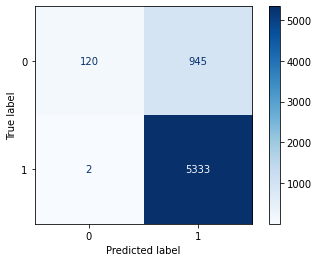

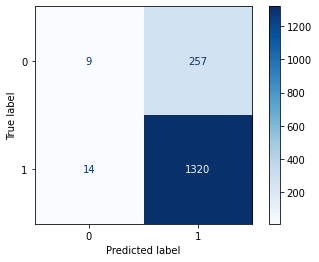

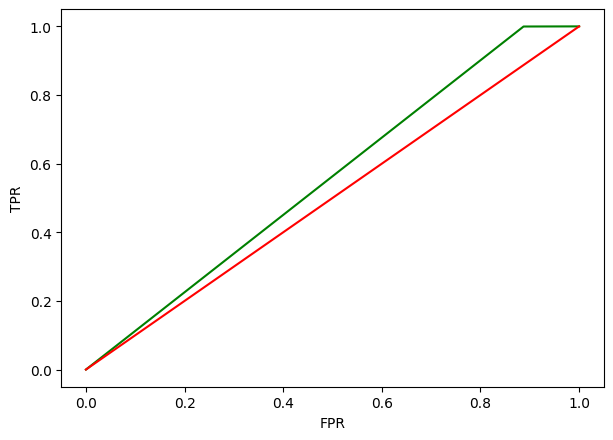

In [103]:
train_xgboost('scaled')

---
### 3.1.4 XGBoost (with most important features)

******************
*   Null Model   *
******************


,model,t_accuracy,t_precision,t_recall,t_F1,v_accuracy,v_precision,v_recall,v_F1
0,Base,0.833594,0.833594,1.0,0.757942,0.83375,0.83375,1.0,0.758161


**************************
*   Comparison Models    *
**************************
2022-02-27 23:26:54.101122


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.833906,0.836909,0.994564,0.908951,0.704703,0.831875,0.834275,0.996252,0.908097,0.691859
1,KNN Euclidian,0.852500,0.865734,0.974133,0.916740,0.858839,0.815625,0.842001,0.958771,0.896600,0.613957
2,KNN Manhattan,0.857187,0.867865,0.977507,0.919429,0.861409,0.806875,0.838284,0.952024,0.891541,0.623322
3,XGBoost,0.966250,0.961254,0.999813,0.980154,0.997648,0.812500,0.842384,0.953523,0.894515,0.643677


*******************
*   Grid Search   *
*******************
2022-02-27 23:26:55.770311
Best: 0.834375 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 400, 'subsample': 0.5}
**************************
*   Best XGBoost Model   *
**************************
2022-02-27 23:36:48.112002


,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,XGBoost,0.83875,0.840266,0.995876,0.911477,0.748216,0.83125,0.835435,0.993253,0.907534,0.690788


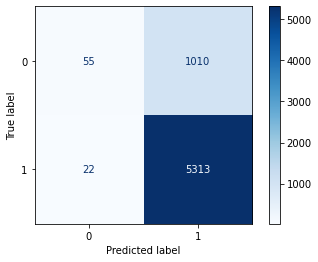

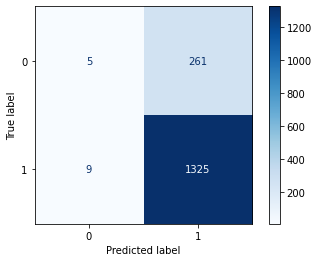

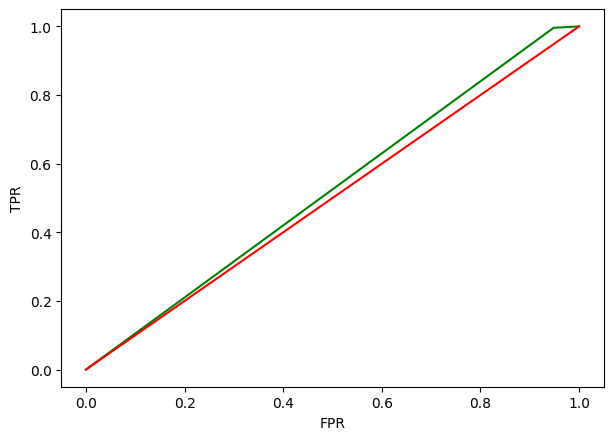

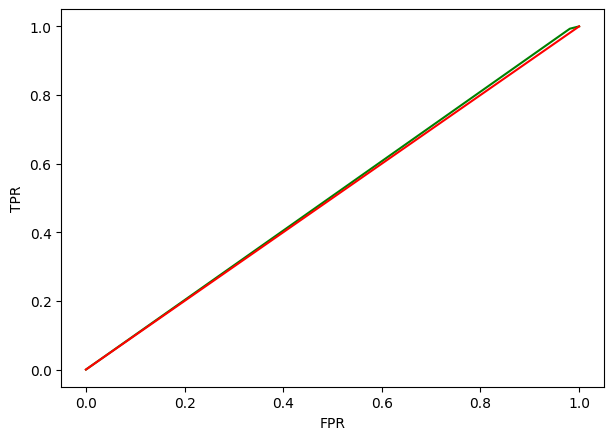

In [109]:
train_xgboost('xgb_features')

# Kaggle Submission File

In [55]:
# Train LR with Best Parameters from hyperparameter tuning
X_train, y_train, X_val, y_val, X_test, y_test = dataprep.load_sets('scaled_minmax_new_9features')
models_to_fit = {"Logistic Regression": LogisticRegression(random_state=8, solver='liblinear', penalty='l2', C=1.0)}
clf10 = fit_score_models (models_to_fit, X_train, y_train, X_val, y_val, "YES")
df_test = pd.read_csv('../data/raw/test.csv')
# Copy Dataset for Preparation
df_cleaned = df_test.copy()
# Replace negative values in identified columns with mean
negCols = ['3P Made','3PA','3P%','BLK','GP','FT%']
df_cleaned = dataprep.replace_negatives(df_cleaned, negCols)
# Construct New Features
df_cleaned['TSA'] = ((df_cleaned['FGA'] + (0.44*df_cleaned['FTA']))).round(1)
df_cleaned['TS%'] = (((df_cleaned['PTS'] / (2*df_cleaned['TSA'])))*100).round(1)
df_cleaned['TOV%'] = ((df_cleaned['TOV'] * 100) / (df_cleaned['TSA'] + df_cleaned['TSA'])).round(1)
df_cleaned['EXPOS'] = (df_cleaned['STL'] + df_cleaned['BLK'] + df_cleaned['OREB'])
# Drop unneccessary features
#features=['Id','GP','MIN','PTS','FG%','FT%','REB','TS%','TOV%','EXPOS']
new_features=['Id','GP','TS%','FG%','3P%','TOV%','FT%','MIN','EXPOS','AST']
df_cleaned = df_cleaned[new_features]
# Drop ID and Scale Features
X_test = df_cleaned.copy()
X_test = dataprep.drop_features(X_test, ['Id'])
X_test = dataprep.scale_features(X_test, MinMaxScaler(), None)
#X_test.describe()
test_probs = clf10.predict_proba(X_test)[:, 1]
df_kaggle = pd.DataFrame({'Id': df_cleaned['Id'], 'TARGET_5Yrs': test_probs});
df_kaggle.shape
df_kaggle.to_csv("../data/external/williams_sean-week3_LR-scaled_minmax_new_9features.csv", index=False)

,model,t_accuracy,t_precision,t_recall,t_F1,t_auc,v_accuracy,v_precision,v_recall,v_F1,v_auc
0,Logistic Regression,0.834531,0.836587,0.996064,0.909386,0.703675,0.8325,0.834379,0.997001,0.90847,0.694178


C:\Users\Sean Williams\.virtualenvs\kaggle-nba-career-prediction-0ju6VdSh\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
